# Code for beginner to learn how to use SIF4Sci

In this notebook, we will show you the basic usage to apply SIF to prepare data for conducting scientific experiments.

We use the demo item (an exercise from LUNA) shown in the following Figure.
![Figure](../../asset/_static/item.png).
The SIF expression of this item can be written as follows:

In [1]:
item = {
  "stem": r"如图来自古希腊数学家希波克拉底所研究的几何图形．此图由三个半圆构成，三个半圆的直径分别为直角三角形$ABC$的斜边$BC$, 直角边$AB$, $AC$.$\bigtriangleup ABC$的三边所围成的区域记为$I$,黑色部分记为$II$, 其余部分记为$III$.在整个图形中随机取一点，此点取自$I,II,III$的概率分别记为$p_1,p_2,p_3$,则$\SIFChoice$$\FigureID{1}$",
  "options": ["$p_1=p_2$", "$p_1=p_3$", "$p_2=p_3$", "$p_1=p_2+p_3$"]
}
item["stem"]

'如图来自古希腊数学家希波克拉底所研究的几何图形．此图由三个半圆构成，三个半圆的直径分别为直角三角形$ABC$的斜边$BC$, 直角边$AB$, $AC$.$\\bigtriangleup ABC$的三边所围成的区域记为$I$,黑色部分记为$II$, 其余部分记为$III$.在整个图形中随机取一点，此点取自$I,II,III$的概率分别记为$p_1,p_2,p_3$,则$\\SIFChoice$$\\FigureID{1}$'

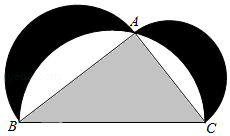

In [2]:
from PIL import Image
img = Image.open("../../asset/_static/item_figure.png")
figures = {"1": img}
img

## Preparation

In [3]:
from EduNLP.SIF import sif4sci

## Verification

## Auto Correction

## Segment and Tokenization

After we verify an item obeys SIF, we can further process it, i.e., segment and tokenization.

### Segment

In [4]:
sif4sci(item["stem"], figures=figures, tokenization=False, symbol="tfgm")


['[TEXT]', '[FORMULA]', '[TEXT]', '[FORMULA]', '[TEXT]', '[FORMULA]', '[TEXT]', '[FORMULA]', '[TEXT]', '[FORMULA]', '[TEXT]', '[FORMULA]', '[TEXT]', '[FORMULA]', '[TEXT]', '[FORMULA]', '[TEXT]', '[FORMULA]', '[TEXT]', '[FORMULA]', '[TEXT]', '[MARK]', '[FIGURE]']

In [5]:
segments = sif4sci(item["stem"], figures=figures, tokenization=False)
segments

['如图来自古希腊数学家希波克拉底所研究的几何图形．此图由三个半圆构成，三个半圆的直径分别为直角三角形', 'ABC', '的斜边', 'BC', ', 直角边', 'AB', ', ', 'AC', '.', '\\bigtriangleup ABC', '的三边所围成的区域记为', 'I', ',黑色部分记为', 'II', ', 其余部分记为', 'III', '.在整个图形中随机取一点，此点取自', 'I,II,III', '的概率分别记为', 'p_1,p_2,p_3', ',则', '\\SIFChoice', \FigureID{1}]

In [6]:
segments.text_segments

['如图来自古希腊数学家希波克拉底所研究的几何图形．此图由三个半圆构成，三个半圆的直径分别为直角三角形',
 '的斜边',
 ', 直角边',
 ', ',
 '.',
 '的三边所围成的区域记为',
 ',黑色部分记为',
 ', 其余部分记为',
 '.在整个图形中随机取一点，此点取自',
 '的概率分别记为',
 ',则']

In [7]:
segments.figure_segments

[\FigureID{1}]

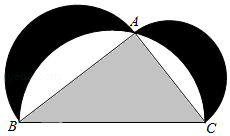

In [8]:
segments.figure_segments[0].figure

In [9]:
segments.formula_segments

['ABC',
 'BC',
 'AB',
 'AC',
 '\\bigtriangleup ABC',
 'I',
 'II',
 'III',
 'I,II,III',
 'p_1,p_2,p_3']

In [10]:
segments.ques_mark_segments

['\\SIFChoice']

### Tokenization

In [20]:
tokens = sif4sci(item["stem"], figures=figures, tokenization=True)

#### Text

In [12]:
tokens.text_tokens

['如图',
 '古希腊',
 '数学家',
 '希波',
 '克拉底',
 '研究',
 '几何图形',
 '此图',
 '三个',
 '半圆',
 '三个',
 '半圆',
 '直径',
 '直角三角形',
 '斜边',
 '直角',
 '三边',
 '围成',
 '区域',
 '记',
 '黑色',
 '记',
 '其余部分',
 '记',
 '图形',
 '中',
 '随机',
 '取',
 '一点',
 '此点',
 '取自',
 '概率',
 '记']

#### Formula

In [13]:
tokens.formula_tokens

['ABC',
 'BC',
 'AB',
 'AC',
 '\\bigtriangleup',
 'ABC',
 'I',
 'II',
 'III',
 'I',
 ',',
 'II',
 ',',
 'III',
 'p',
 '_',
 '1',
 ',',
 'p',
 '_',
 '2',
 ',',
 'p',
 '_',
 '3']

In [14]:
sif4sci(
    item["stem"],
    figures=figures,
    tokenization=True,
    tokenization_params={
        "formula_params": {
            "method": "ast",
            "return_type": "list"
        }
    }
).formula_tokens

['A',
 'B',
 'C',
 'B',
 'C',
 'A',
 'B',
 'A',
 'C',
 '\\bigtriangleup',
 'A',
 'B',
 'C',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 ',',
 'I',
 'I',
 ',',
 'I',
 'I',
 'I',
 'p',
 '1',
 '_',
 ',',
 'p',
 '2',
 '_',
 ',',
 'p',
 '3',
 '_']

In [15]:
sif4sci(
    item["stem"],
    figures=figures,
    tokenization=True,
    tokenization_params={
        "formula_params":{
            "method": "ast",
            "return_type": "list",
            "ord2token": True
        }
    }
).formula_tokens

['mathord',
 'mathord',
 'mathord',
 'mathord',
 'mathord',
 'mathord',
 'mathord',
 'mathord',
 'mathord',
 '\\bigtriangleup',
 'mathord',
 'mathord',
 'mathord',
 'mathord',
 'mathord',
 'mathord',
 'mathord',
 'mathord',
 'mathord',
 'mathord',
 ',',
 'mathord',
 'mathord',
 ',',
 'mathord',
 'mathord',
 'mathord',
 'mathord',
 'textord',
 '_',
 ',',
 'mathord',
 'textord',
 '_',
 ',',
 'mathord',
 'textord',
 '_']

In [16]:
sif4sci(
    item["stem"],
    figures=figures,
    tokenization=True,
    tokenization_params={
        "formula_params":{
            "method": "ast",
            "return_type": "list",
            "ord2token": True,
            "var_numbering": True
        }
    }
).formula_tokens

['mathord_0',
 'mathord_1',
 'mathord_2',
 'mathord_0',
 'mathord_1',
 'mathord_0',
 'mathord_1',
 'mathord_0',
 'mathord_1',
 '\\bigtriangleup',
 'mathord_0',
 'mathord_1',
 'mathord_2',
 'mathord_0',
 'mathord_0',
 'mathord_0',
 'mathord_0',
 'mathord_0',
 'mathord_0',
 'mathord_0',
 ',',
 'mathord_0',
 'mathord_0',
 ',',
 'mathord_0',
 'mathord_0',
 'mathord_0',
 'mathord_0',
 'textord',
 '_',
 ',',
 'mathord_0',
 'textord',
 '_',
 ',',
 'mathord_0',
 'textord',
 '_']

In [17]:
sif4sci(
    item["stem"],
    figures=figures,
    tokenization=True,
    tokenization_params={
        "formula_params":{
            "method": "ast",
            "return_type": "formula",
            "ord2token": True,
            "var_numbering": True
        }
    }
).formula_tokens

[<Formula: ABC>,
 <Formula: BC>,
 <Formula: AB>,
 <Formula: AC>,
 <Formula: \bigtriangleup ABC>,
 <Formula: I>,
 <Formula: II>,
 <Formula: III>,
 <Formula: I,II,III>,
 <Formula: p_1,p_2,p_3>]

In [18]:
sif4sci(
    item["stem"],
    figures=figures,
    tokenization=True,
    tokenization_params={
        "formula_params":{
            "method": "ast",
            "return_type": "ast",
            "ord2token": True,
            "var_numbering": True
        }
    }
).formula_tokens

#### Figure

## Downstream tasks

### Word to vector

In [19]:
sif4sci(item["stem"], figures=figures, tokenization=True, symbol="fgm")

['如图', '古希腊', '数学家', '希波', '克拉底', '研究', '几何图形', '此图', '三个', '半圆', '三个', '半圆', '直径', '直角三角形', '[FORMULA]', '斜边', '[FORMULA]', '直角', '[FORMULA]', '[FORMULA]', '[FORMULA]', '三边', '围成', '区域', '记', '[FORMULA]', '黑色', '记', '[FORMULA]', '其余部分', '记', '[FORMULA]', '图形', '中', '随机', '取', '一点', '此点', '取自', '[FORMULA]', '概率', '记', '[FORMULA]', '[MARK]', '[FIGURE]']